In [18]:
#importing libraries
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import pandas_datareader as pdr

key="30c0973b8a648106ae38faea9031b9a3924c7469"

In [19]:
#Getting Dataset
df=pdr.get_data_tiingo('DIS', api_key=key)
df.to_csv('DIS.csv')
df=pd.read_csv('DIS.csv', date_parser=True)
df

C:\Users\sneha\AppData\Local\Temp\ipykernel_5640\1926857620.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pdr.get_data_tiingo('DIS', api_key=key)


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,DIS,2018-12-10 00:00:00+00:00,111.86,112.290,109.530,111.99,7337457,110.508864,110.933670,108.207008,110.637294,7337457,0.0,1.0
1,DIS,2018-12-11 00:00:00+00:00,111.97,113.720,111.430,112.97,6861759,110.617535,112.346397,110.084058,111.605456,6861759,0.0,1.0
2,DIS,2018-12-12 00:00:00+00:00,112.21,113.980,112.150,113.00,7723872,110.854636,112.603257,110.795361,111.635094,7723872,0.0,1.0
3,DIS,2018-12-13 00:00:00+00:00,113.39,113.600,112.340,112.87,6661534,112.020383,112.227847,110.983066,111.506664,6661534,0.0,1.0
4,DIS,2018-12-14 00:00:00+00:00,112.20,113.920,112.050,112.37,7602301,110.844757,112.543982,110.696569,111.012704,7602301,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,DIS,2023-12-01 00:00:00+00:00,92.58,92.840,91.770,92.74,11898169,92.580000,92.840000,91.770000,92.740000,11898169,0.0,1.0
1254,DIS,2023-12-04 00:00:00+00:00,92.01,92.410,91.610,91.90,12602805,92.010000,92.410000,91.610000,91.900000,12602805,0.0,1.0
1255,DIS,2023-12-05 00:00:00+00:00,90.79,91.780,89.931,91.61,12356988,90.790000,91.780000,89.931000,91.610000,12356988,0.0,1.0
1256,DIS,2023-12-06 00:00:00+00:00,91.50,92.545,90.620,91.11,10386257,91.500000,92.545000,90.620000,91.110000,10386257,0.0,1.0


In [20]:
df.shape

(1258, 14)

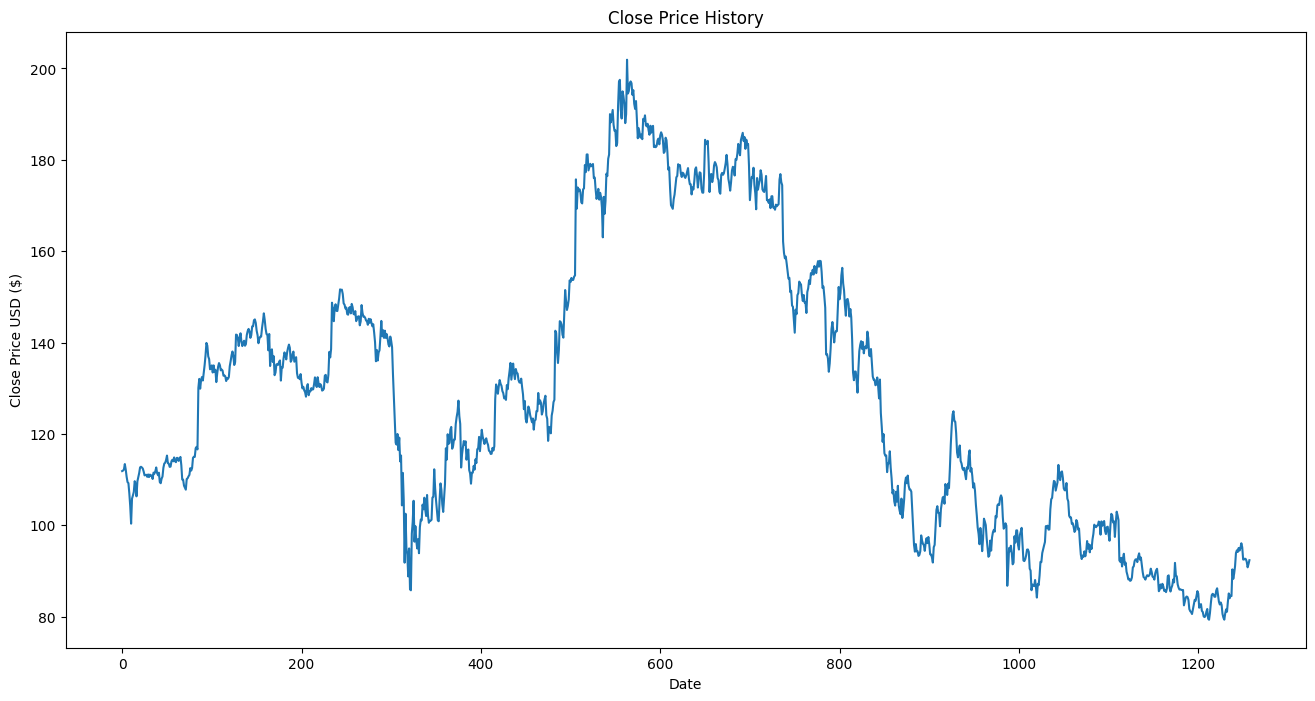

In [21]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(df['close'])
plt.show()

In [22]:
#create a dataframe with only 'Close' column
data=df.filter(['close'])

#covert dataframe into numpy array
dataset=data.values

#get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
test_data_len=len(dataset)-training_data_len
training_data_len

1007

In [23]:
#scale data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.26543764],
       [0.26633494],
       [0.26829268],
       ...,
       [0.09356391],
       [0.09935558],
       [0.10628926]])

In [24]:
#create the scaled training data set
train_data=scaled_data[0:training_data_len, :]

#split data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()


[array([0.26543764, 0.26633494, 0.26829268, 0.27791826, 0.26821111,
       0.25532262, 0.24577861, 0.24390244, 0.22579329, 0.20311608,
       0.17154743, 0.21624929, 0.2218778 , 0.22824048, 0.24741007,
       0.24186312, 0.22032792, 0.24708378, 0.25483318, 0.26184844,
       0.27204503, 0.27310547, 0.27188188, 0.27000571, 0.26462191,
       0.25768823, 0.25850396, 0.25874867, 0.25515947, 0.25940126,
       0.25475161, 0.25915654, 0.2568725 , 0.25760666, 0.25132556,
       0.26266417, 0.26086957, 0.2649482 , 0.27196346, 0.26176687,
       0.25801452, 0.26258259, 0.24569704, 0.24373929, 0.25189657,
       0.25564891, 0.27139245, 0.27889714, 0.28028387, 0.28525981,
       0.29309079, 0.27954972, 0.27881556, 0.27294233, 0.27343176,
       0.28297577, 0.2855861 , 0.2828942 , 0.28982788, 0.28297577])]
[0.28134431845990704]



In [25]:
#convert the x_train and y_train to numpy arrays
x_train, y_train=np.array(x_train), np.array(y_train)

#reshape the data
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(947, 60, 1)

In [26]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [27]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model with 10 epochs and batch size of 32
model.fit(x_train, y_train, batch_size=32, epochs=10)


Epoch 1/10
30/30 [==============================] - 15s 102ms/step - loss: 0.0388
Epoch 2/10
30/30 [==============================] - 2s 75ms/step - loss: 0.0046
Epoch 3/10
30/30 [==============================] - 3s 96ms/step - loss: 0.0027
Epoch 4/10
30/30 [==============================] - 3s 82ms/step - loss: 0.0025
Epoch 5/10
30/30 [==============================] - 2s 66ms/step - loss: 0.0024
Epoch 6/10
30/30 [==============================] - 2s 65ms/step - loss: 0.0023
Epoch 7/10
30/30 [==============================] - 2s 65ms/step - loss: 0.0023
Epoch 8/10
30/30 [==============================] - 2s 63ms/step - loss: 0.0021
Epoch 9/10
30/30 [==============================] - 2s 65ms/step - loss: 0.0020
Epoch 10/10
30/30 [==============================] - 2s 65ms/step - loss: 0.0018


In [28]:
#create the testing dataset
test_data=scaled_data[training_data_len-60:, :]
#create the datasets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [29]:
#convert the data to a numpy array
x_test=np.array(x_test)

#reshape the data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

8/8 [==============================] - 2s 30ms/step


In [31]:
# Corrected RMSE calculation
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

3.3619443614949267

C:\Users\sneha\AppData\Local\Temp\ipykernel_5640\3665711029.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=predictions


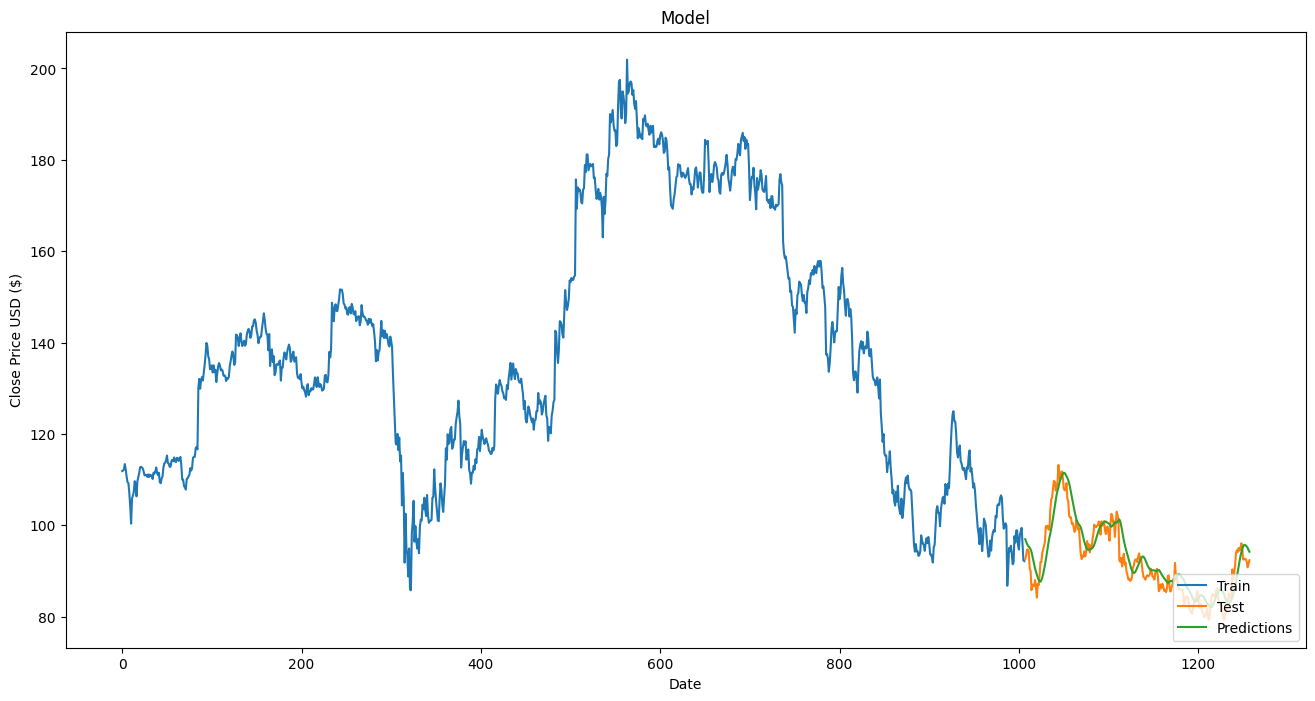

In [32]:
#plot the data
train=data[:training_data_len]
test=data[training_data_len:]
test['predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')   
plt.plot(train['close'])
plt.plot(test[['close', 'predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [33]:
test

,close,predictions
1007,92.55,96.957108
1008,93.38,96.426147
1009,94.66,95.918076
1010,94.70,95.550751
1011,94.15,95.302429
...,...,...
1253,92.58,95.563690
1254,92.01,95.346542
1255,90.79,95.043289
1256,91.50,94.618515


In [40]:
df1=pdr.get_data_tiingo('DIS', api_key=key)
df1.to_csv('DIS.csv')
df1=pd.read_csv('DIS.csv', date_parser=True)

#create a new dataframe
new_df=df1.filter(['close'])
#get the last 60 day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#create an empty list
X_test=[]
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test=np.array(X_test)
#reshape the data
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

C:\Users\sneha\AppData\Local\Temp\ipykernel_5640\1444075388.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df1=pdr.get_data_tiingo('DIS', api_key=key)


1/1 [==============================] - 0s 71ms/step
[[93.85732]]
